WORLD HAPPINESS REPORT — EDA & DATA CLEANING

Autor: Cristian Salinas
Objetivo: Construir un dataset limpio y unificado (2015–2019) para analizar la felicidad global.

1. Configuración del entorno

In [287]:
# ===========================================================
# 📦 Carga de librerías y configuración inicial
# ===========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Ignorar advertencias irrelevantes (para mantener el output limpio)
warnings.filterwarnings("ignore", category=FutureWarning)

# Configuración visual
sns.set(style="whitegrid", rc={"axes.facecolor": "#f9f9f9", "grid.alpha": 0.3})
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11

print("✅ Entorno listo y librerías cargadas correctamente.")


✅ Entorno listo y librerías cargadas correctamente.


2. Lectura y combinación de archivos

Cada archivo .csv corresponde a un año distinto del World Happiness Report.
Los nombres de columnas cambian según el año, por lo tanto se mapean para unificarlos.

In [288]:
# ===========================================================
# 🧩 Lectura de archivos y normalización de columnas
# ===========================================================
data_path = "../data/"
files = [f for f in os.listdir(data_path) if f.endswith(".csv")]

# Mapeo de nombres equivalentes de columnas
column_map = {
    'Happiness Score': 'score',
    'Happiness.Score': 'score',
    'Score': 'score',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'GDP per capita': 'gdp_per_capita',
    'Health (Life Expectancy)': 'healthy_life_expectancy',
    'Health..Life.Expectancy.': 'healthy_life_expectancy',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Freedom': 'freedom',
    'Trust (Government Corruption)': 'trust',
    'Trust..Government.Corruption.': 'trust',
    'Perceptions of corruption': 'trust',
    'Generosity': 'generosity',
    'Family': 'social_support',
    'Social support': 'social_support',
    'Region': 'region',
    'Country': 'country',
    'Country or region': 'country'
}

df_list = []

for file in files:
    year = int(file.split(".")[0])
    temp = pd.read_csv(os.path.join(data_path, file))
    
    # Renombrar columnas con nombres homogéneos
    temp.rename(columns=column_map, inplace=True)
    temp['year'] = year
    
    # Filtrar columnas clave (si existen)
    cols_base = ['country', 'region', 'score', 'gdp_per_capita',
                 'social_support', 'healthy_life_expectancy',
                 'freedom', 'trust', 'generosity', 'year']
    available_cols = [c for c in cols_base if c in temp.columns]
    df_list.append(temp[available_cols])

# Combinar todos los años
df = pd.concat(df_list, ignore_index=True)
print("✅ Archivos combinados correctamente.")
print(f"Shape final: {df.shape}")


✅ Archivos combinados correctamente.
Shape final: (782, 10)


3. Exploración inicial del dataset

Se revisan columnas, tipos de datos, nulos y duplicados.

In [289]:
# ===========================================================
# 🔍 Exploración inicial
# ===========================================================
print("\nColumnas disponibles:", df.columns.tolist())
print("\nInformación general:")
df.info()

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nDuplicados totales:", df.duplicated().sum())

# Primeras filas de referencia
df.head()



Columnas disponibles: ['country', 'region', 'score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'trust', 'generosity', 'year']

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  782 non-null    object 
 1   region                   315 non-null    object 
 2   score                    782 non-null    float64
 3   gdp_per_capita           782 non-null    float64
 4   social_support           782 non-null    float64
 5   healthy_life_expectancy  782 non-null    float64
 6   freedom                  782 non-null    float64
 7   trust                    781 non-null    float64
 8   generosity               782 non-null    float64
 9   year                     782 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB

Va

,country,region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,trust,generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


4. Limpieza de valores nulos y estandarización

Eliminamos columnas con más del 70% de nulos, rellenamos los demás con medias
y aseguramos coherencia entre columnas relacionadas (por ejemplo, country y region).

In [290]:
# ===========================================================
# 🧼 Limpieza de valores nulos
# ===========================================================
porcentaje_nulos = (df.isna().sum() / len(df)) * 100
print("\n📋 Porcentaje de nulos por columna:")
print(porcentaje_nulos.round(2))

# Eliminar columnas con >70% nulos
cols_eliminar = porcentaje_nulos[porcentaje_nulos > 70].index.tolist()
df.drop(columns=cols_eliminar, inplace=True)

# Rellenar valores faltantes según tipo
for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna('Desconocido', inplace=True)

print("\n✅ Limpieza de nulos completada.")



📋 Porcentaje de nulos por columna:
country                     0.00
region                     59.72
score                       0.00
gdp_per_capita              0.00
social_support              0.00
healthy_life_expectancy     0.00
freedom                     0.00
trust                       0.13
generosity                  0.00
year                        0.00
dtype: float64

✅ Limpieza de nulos completada.


5. Análisis general de correlaciones

Se exploran las relaciones entre variables numéricas y su impacto en la felicidad.

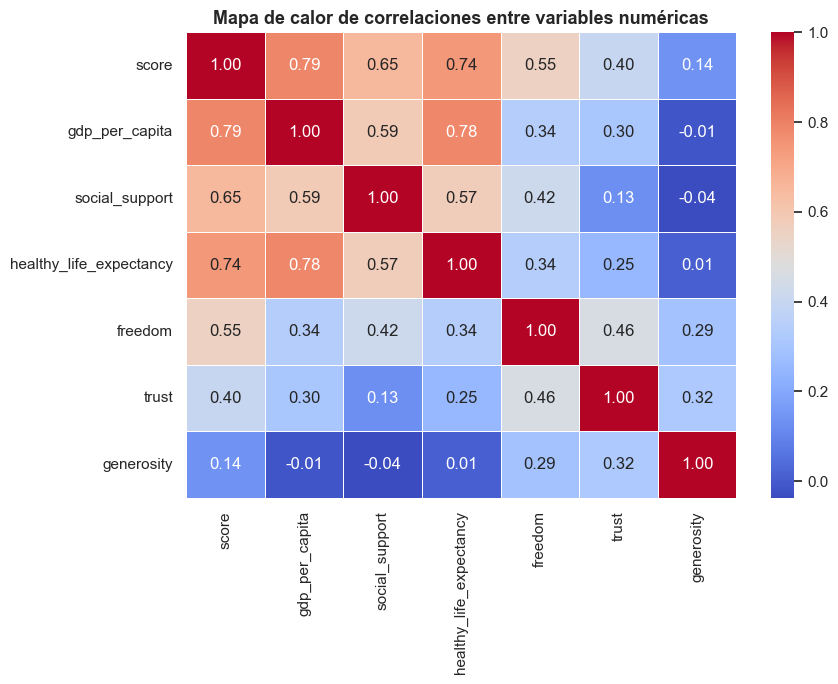

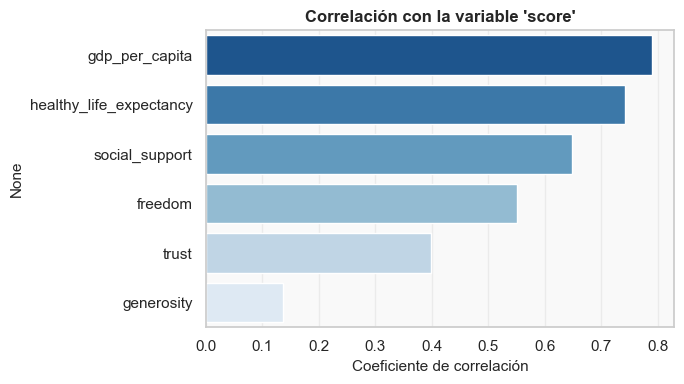

In [291]:
# ===========================================================
# 📈 Correlaciones entre variables
# ===========================================================
corr = df.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

# Correlación con 'score'
corr_con_score = corr['score'].drop('score').sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=corr_con_score.values, y=corr_con_score.index, palette="Blues_r")
plt.title("Correlación con la variable 'score'", fontsize=12, weight='bold')
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()


6. Ranking de felicidad (Top y Bottom 10)

7. Tendencia global en el tiempo

Promedio mundial del índice de felicidad por año.

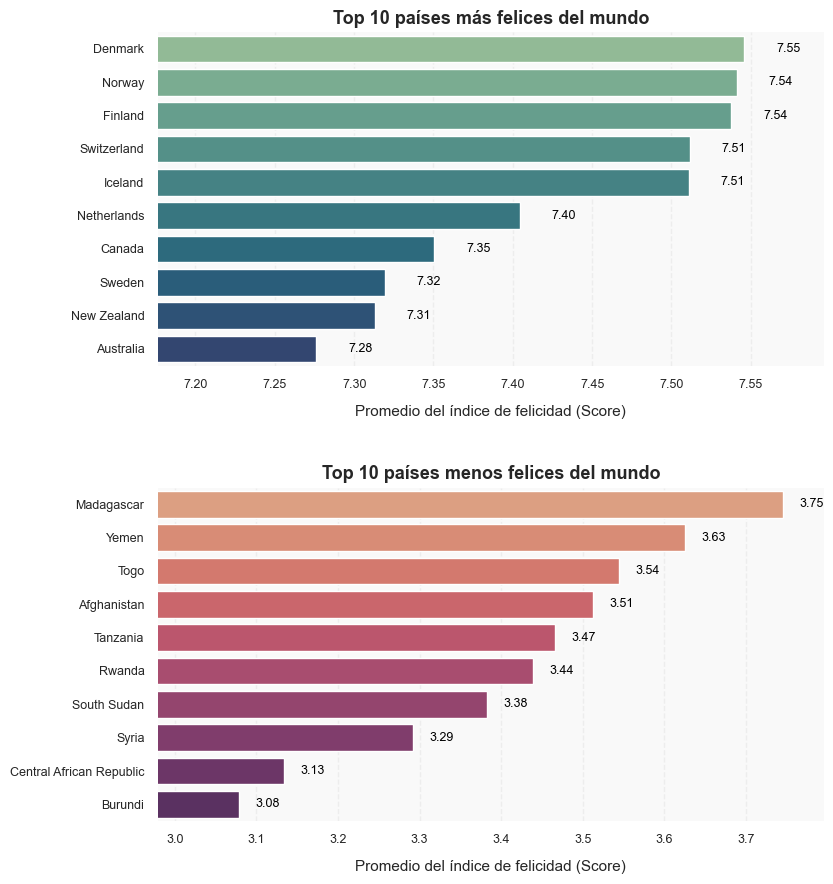

In [298]:
# ===========================================================
# 🌍 Top 10 y Bottom 10 países según felicidad (versión final estilizada)
# ===========================================================
fig, axes = plt.subplots(2, 1, figsize=(8.5, 9))

# --- Parámetros globales ---
valor_fontsize = 9        # tamaño de los números dentro/fuera de barras
valor_offset = 0.02       # desplazamiento horizontal de los valores
label_pad = 10            # distancia de etiqueta de eje X

# --- TOP 10 ---
sns.barplot(x=top10.values, y=top10.index, palette="crest", ax=axes[0])
axes[0].set_title("Top 10 países más felices del mundo", fontsize=13, weight='bold')
axes[0].set_xlabel("Promedio del índice de felicidad (Score)", fontsize=11, labelpad=label_pad)
axes[0].set_ylabel("")

min_top, max_top = top10.min(), top10.max()
axes[0].set_xlim(min_top - 0.1, max_top + 0.05)

for i, v in enumerate(top10.values):
    axes[0].text(v + valor_offset, i, f"{v:.2f}", va='center', ha='left',
                 fontsize=valor_fontsize, color='black')

# --- BOTTOM 10 ---
sns.barplot(x=bottom10.values, y=bottom10.index, palette="flare", ax=axes[1])
axes[1].set_title("Top 10 países menos felices del mundo", fontsize=13, weight='bold')
axes[1].set_xlabel("Promedio del índice de felicidad (Score)", fontsize=11, labelpad=label_pad)
axes[1].set_ylabel("")

min_bot, max_bot = bottom10.min(), bottom10.max()
axes[1].set_xlim(min_bot - 0.1, max_bot + 0.05)

for i, v in enumerate(bottom10.values):
    axes[1].text(v + valor_offset, i, f"{v:.2f}", va='center', ha='left',
                 fontsize=valor_fontsize, color='black')

# --- Estética general ---
for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(axis='x', linestyle='--', alpha=0.25)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

plt.tight_layout(h_pad=2.8)
plt.show()


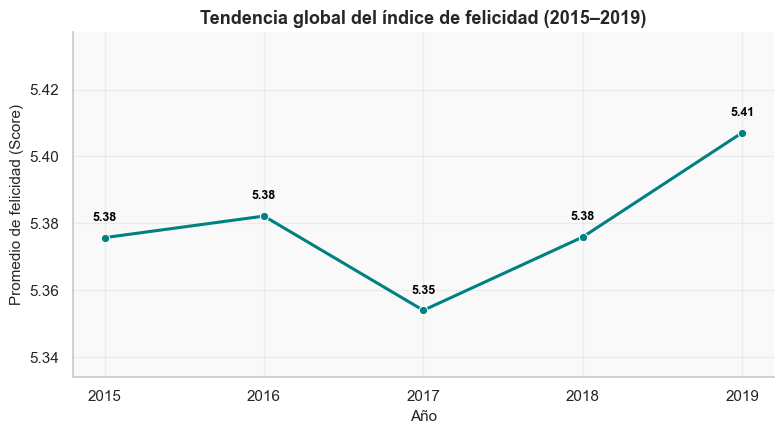

In [296]:
# ===========================================================
# 📆 Tendencia global del índice de felicidad (2015–2019)
# ===========================================================
plt.figure(figsize=(8,4.5))
sns.lineplot(data=trend, x='year', y='score', marker='o', color='teal', linewidth=2.2)

# Etiquetas de datos sobre cada punto
for x, y in zip(trend['year'], trend['score']):
    plt.text(x, y + 0.005, f"{y:.2f}", ha='center', fontsize=9, color='black', weight='bold')

# Mejoras estéticas
plt.title("Tendencia global del índice de felicidad (2015–2019)", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Promedio de felicidad (Score)")
plt.xticks(trend['year'], [str(int(a)) for a in trend['year']])  # años sin decimales
plt.ylim(trend['score'].min() - 0.02, trend['score'].max() + 0.03)
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


In [299]:
if 'region' not in df.columns:
    print("⚠️ No se encontró columna 'region'. Algunas versiones del dataset no incluyen esta categoría.")
else:
    print("✅ Columna 'region' detectada correctamente.")


✅ Columna 'region' detectada correctamente.


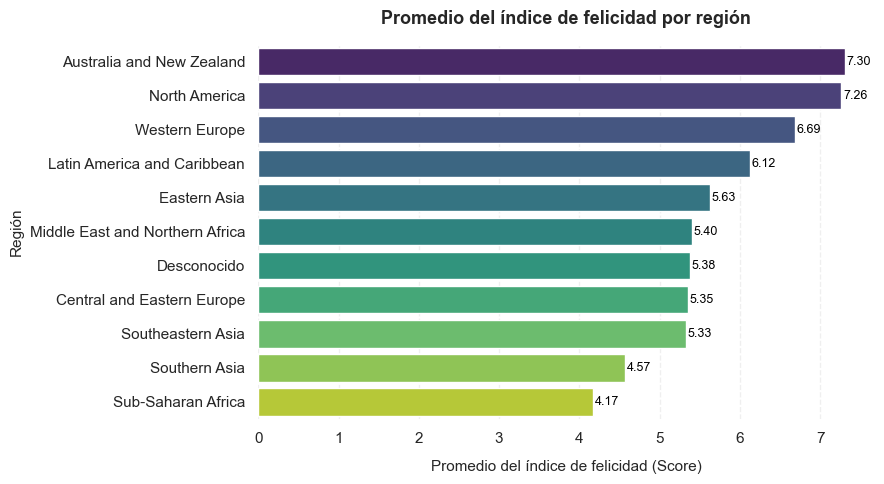

In [300]:
# ===========================================================
# 🌎 Promedio de felicidad (Score) por región
# ===========================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Comprobamos si la columna 'region' existe
if 'region' in df.columns:

    # Agrupar por región y calcular promedio del score
    region_mean = df.groupby('region')['score'].mean().sort_values(ascending=False)

    # Estilo visual
    sns.set_style("whitegrid")
    plt.figure(figsize=(9, 5))

    # Crear el barplot
    ax = sns.barplot(
        x=region_mean.values,
        y=region_mean.index,
        palette="viridis"
    )

    # Título y ejes
    plt.title("Promedio del índice de felicidad por región", fontsize=13, weight='bold', pad=15)
    plt.xlabel("Promedio del índice de felicidad (Score)", fontsize=11, labelpad=10)
    plt.ylabel("Región", fontsize=11)

    # Mostrar valores al lado derecho de las barras
    for i, v in enumerate(region_mean.values):
        plt.text(v + 0.02, i, f"{v:.2f}", va='center', fontsize=9, color='black')

    # Ajustes visuales
    sns.despine(left=True, bottom=True)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Este dataset no tiene columna 'region'. Podrías considerar agrupar manualmente por continente usando otra fuente (ej. country-mapping).")
